In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
ckd_data = pd.read_csv("/content/Chronic_Kidney_Dsease_data.csv")

In [3]:
ckd_data.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [4]:
print("Dataset Information:")
ckd_data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease 

In [5]:
print("\nMissing Values:")
print(ckd_data.isnull().sum())


Missing Values:
PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
Ser

In [6]:
print("\nStatistical Summary:")
print(ckd_data.describe())


Statistical Summary:
         PatientID          Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.000000  1659.00000          1659.000000   
mean    830.000000    54.441230     0.515371     0.71308             0.977697   
std     479.056364    20.549757     0.499914     1.00043             0.776686   
min       1.000000    20.000000     0.000000     0.00000             0.000000   
25%     415.500000    36.000000     0.000000     0.00000             0.000000   
50%     830.000000    54.000000     1.000000     0.00000             1.000000   
75%    1244.500000    72.000000     1.000000     1.00000             2.000000   
max    1659.000000    90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670 

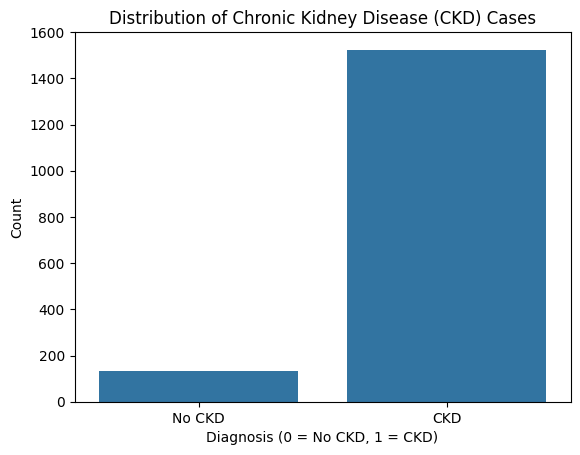

In [7]:
sns.countplot(data=ckd_data, x='Diagnosis')
plt.title("Distribution of Chronic Kidney Disease (CKD) Cases")
plt.xlabel("Diagnosis (0 = No CKD, 1 = CKD)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No CKD", "CKD"])
plt.show()

In [8]:
for column in ckd_data.columns:
    if ckd_data[column].dtype == 'object':
        ckd_data[column].fillna(ckd_data[column].mode()[0], inplace=True)
    else:
        ckd_data[column].fillna(ckd_data[column].mean(), inplace=True)

<ipython-input-8-326ac414ee7e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ckd_data[column].fillna(ckd_data[column].mean(), inplace=True)
<ipython-input-8-326ac414ee7e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [9]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in ckd_data.select_dtypes(include='object').columns:
    ckd_data[column] = label_encoder.fit_transform(ckd_data[column])

In [10]:
# Feature scaling (standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ckd_data.drop('Diagnosis', axis=1))
X = pd.DataFrame(scaled_features, columns=ckd_data.columns[:-1])
y = ckd_data['Diagnosis']

In [11]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

print("Class Distribution Before SMOTE:")
print(y_train.value_counts())

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass Distribution After SMOTE:")
print(y_train_smote.value_counts())

Class Distribution Before SMOTE:
Diagnosis
1    1216
0     111
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class Distribution After SMOTE:
Diagnosis
1    1216
0    1216
Name: count, dtype: int64


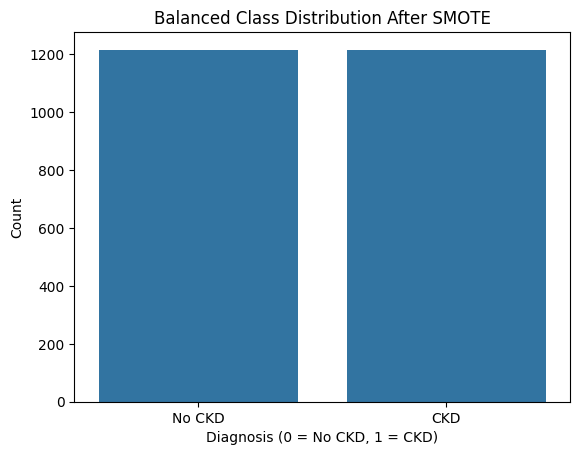

In [13]:
# Class distribution after SMOTE
sns.countplot(x=y_train_smote)
plt.title("Balanced Class Distribution After SMOTE")
plt.xlabel("Diagnosis (0 = No CKD, 1 = CKD)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No CKD", "CKD"])
plt.show()

In [14]:
# Dimensionality Reduction using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_smote)

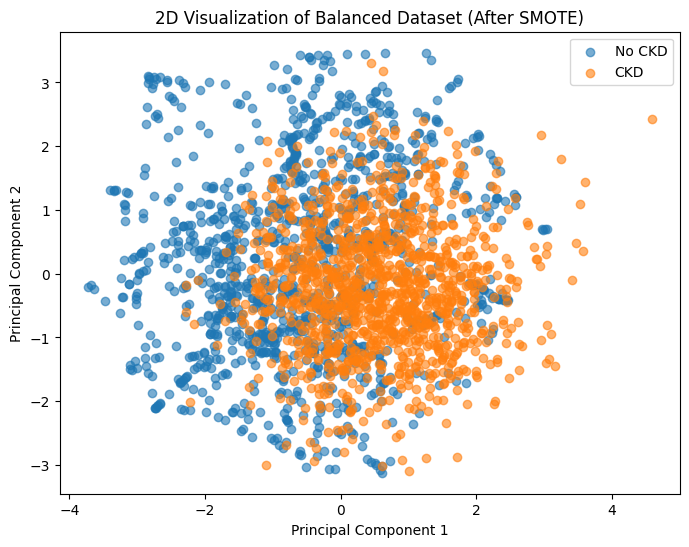

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y_train_smote == 0, 0], X_train_pca[y_train_smote == 0, 1], label="No CKD", alpha=0.6)
plt.scatter(X_train_pca[y_train_smote == 1, 0], X_train_pca[y_train_smote == 1, 1], label="CKD", alpha=0.6)
plt.title("2D Visualization of Balanced Dataset (After SMOTE)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

#Random Forest

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = rf_model.predict(X_test)

In [18]:
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Model Accuracy: 0.9096385542168675

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.12      0.17        24
           1       0.93      0.97      0.95       308

    accuracy                           0.91       332
   macro avg       0.59      0.55      0.56       332
weighted avg       0.88      0.91      0.90       332


Confusion Matrix:
 [[  3  21]
 [  9 299]]


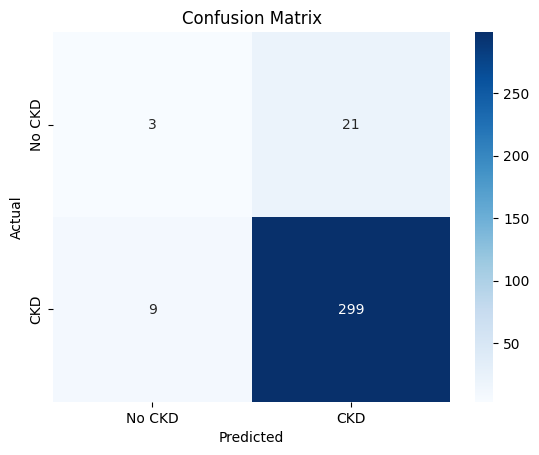

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

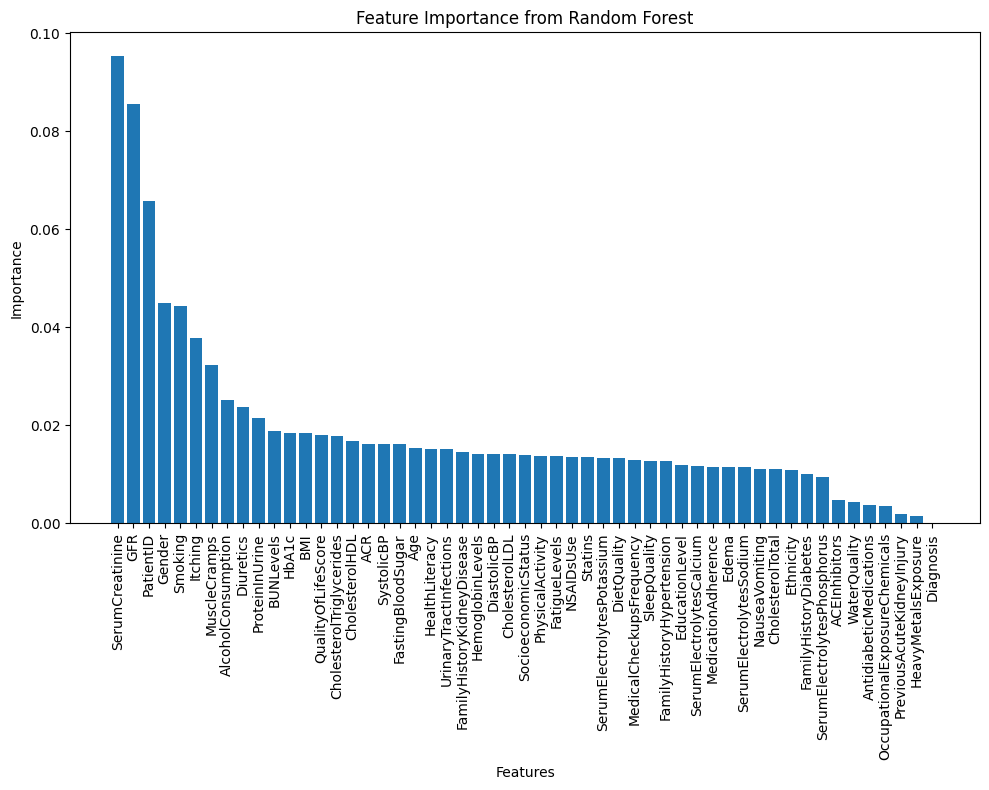

In [20]:
# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.bar(range(len(features)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(features)), features[sorted_indices], rotation=90)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

#Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_smote, y_train_smote)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Model Accuracy: 0.8433734939759037

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.67      0.38        24
           1       0.97      0.86      0.91       308

    accuracy                           0.84       332
   macro avg       0.62      0.76      0.65       332
weighted avg       0.92      0.84      0.87       332



#SVM

In [22]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

y_pred_svm = svm_model.predict(X_test)

print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))

SVM Model Accuracy: 0.8403614457831325

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.25      0.62      0.36        24
           1       0.97      0.86      0.91       308

    accuracy                           0.84       332
   macro avg       0.61      0.74      0.64       332
weighted avg       0.92      0.84      0.87       332



#KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

y_pred_knn = knn_model.predict(X_test)

print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))

KNN Model Accuracy: 0.3855421686746988

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.10      0.96      0.18        24
           1       0.99      0.34      0.51       308

    accuracy                           0.39       332
   macro avg       0.55      0.65      0.35       332
weighted avg       0.93      0.39      0.48       332



#XGBoost

In [24]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:47:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.9186746987951807

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.42      0.33      0.37        24
           1       0.95      0.96      0.96       308

    accuracy                           0.92       332
   macro avg       0.68      0.65      0.66       332
weighted avg       0.91      0.92      0.91       332



#ANN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

y_train_smote_categorical = to_categorical(y_train_smote, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

ann_model = Sequential([
    Dense(64, input_dim=X_train_smote.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 neurons for binary classification
])

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = ann_model.fit(X_train_smote, y_train_smote_categorical, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)

print("ANN Model Accuracy:", accuracy_score(y_test, y_pred_ann))
print("\nClassification Report (ANN):\n", classification_report(y_test, y_pred_ann))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5281 - loss: 0.7787 - val_accuracy: 0.3943 - val_loss: 0.7838
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7392 - loss: 0.5077 - val_accuracy: 0.7372 - val_loss: 0.5484
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8430 - loss: 0.3801 - val_accuracy: 0.8953 - val_loss: 0.3645
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8592 - loss: 0.3149 - val_accuracy: 0.9446 - val_loss: 0.2854
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8942 - loss: 0.2594 - val_accuracy: 0.9425 - val_loss: 0.2469
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9115 - loss: 0.2071 - val_accuracy: 0.9733 - val_loss: 0.1782
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9321 - loss: 0.1757 - val_accuracy: 0.9877 - val_loss: 0.1191
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9391 - loss: 0.1711 - val_accuracy: 0.9856 - val_loss:

#Comparison


Model Accuracies:
Random Forest: 0.9096
SVM: 0.8404
KNN: 0.3855
XGBoost: 0.9187
ANN: 0.9247


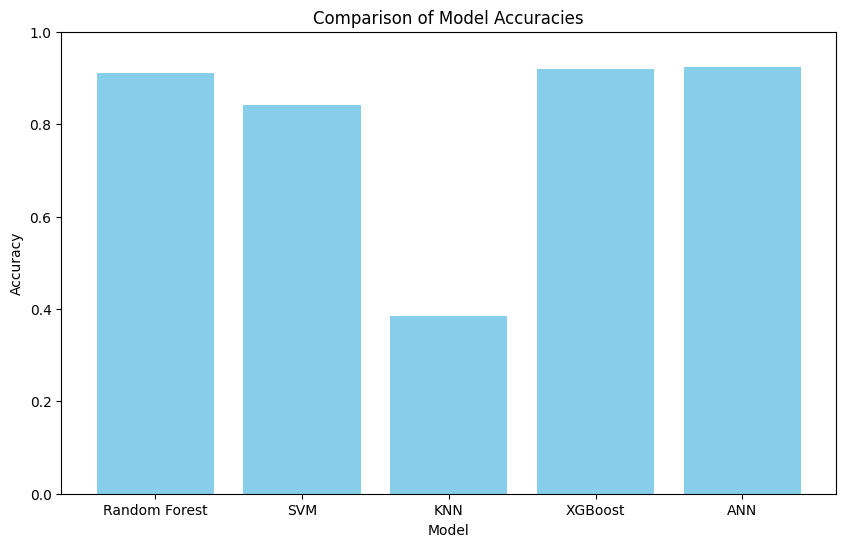

In [26]:
model_accuracies = {
    "Random Forest": accuracy_score(y_test, y_pred),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "ANN": accuracy_score(y_test, y_pred_ann)
}


print("\nModel Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

#Testing Best Model (ANN)

In [27]:
ckd_data = pd.read_csv("/content/Chronic_Kidney_Dsease_data.csv")

#Encode the 'DoctorInCharge' column globally using LabelEncoder
if 'DoctorInCharge' in ckd_data.columns:
    label_encoder = LabelEncoder()
    ckd_data['DoctorInCharge'] = label_encoder.fit_transform(ckd_data['DoctorInCharge'])

#Dropping unnecessary columns (e.g., PatientID) and split features/target
X = ckd_data.drop(['Diagnosis', 'PatientID'], axis=1)  # Drop target and any irrelevant columns
y = ckd_data['Diagnosis']  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [28]:
#Training ANN (since its the best model)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

y_train_smote_categorical = to_categorical(y_train_smote, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

ann_model = Sequential([
    Dense(64, input_dim=X_train_smote.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_smote, y_train_smote_categorical, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5181 - loss: 0.8697 - val_accuracy: 0.3881 - val_loss: 0.8363
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7546 - loss: 0.5179 - val_accuracy: 0.7023 - val_loss: 0.5826
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8136 - loss: 0.3989 - val_accuracy: 0.8008 - val_loss: 0.4308
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8724 - loss: 0.3048 - val_accuracy: 0.8522 - val_loss: 0.3624
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8894 - loss: 0.2631 - val_accuracy: 0.9220 - val_loss: 0.2767
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9154 - loss: 0.2246 - val_accuracy: 0.9261 - val_loss: 0.2480
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9269 - loss: 0.1990 - val_accuracy: 0.9630 - val_loss: 0.1996
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9318 - loss: 0.1923 - val_accuracy: 0.9713 - val_loss: 0.1678
Epo

In [29]:
#Test the ANN model on random rows of data from dataset
import random

# Number of random rows to test
num_rows_to_test = 5

# Randomly select row indices
random_indices = random.sample(range(len(ckd_data)), num_rows_to_test)


In [30]:
# Iterate over the randomly selected rows
for row_index in random_indices:
    single_row = ckd_data.iloc[row_index].drop(['Diagnosis', 'PatientID'])  # Drop target and irrelevant columns
    single_row_df = pd.DataFrame([single_row], columns=X.columns)  # Ensure column alignment
    single_row_scaled = scaler.transform(single_row_df)

    # Predict using the ANN model
    single_row_prediction = np.argmax(ann_model.predict(single_row_scaled), axis=1)
    prediction_label = "CKD" if single_row_prediction[0] == 1 else "No CKD"

    # Retrieve the actual label for comparison
    actual_label = ckd_data.iloc[row_index]['Diagnosis']
    actual_label_text = "CKD" if actual_label == 1 else "No CKD"

    # Print results
    print(f"Testing on Row Index: {row_index}")
    print(f"Prediction: {prediction_label}")
    print(f"Actual Result: {actual_label_text}")

    # Verify if the prediction matches the actual result
    if prediction_label == actual_label_text:
        print("The prediction matches the actual result. ✅")
    else:
        print("The prediction does NOT match the actual result. ❌")

    print("-" * 50)  # Separator for readability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Testing on Row Index: 942
Prediction: CKD
Actual Result: CKD
The prediction matches the actual result. ✅
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Testing on Row Index: 1314
Prediction: CKD
Actual Result: CKD
The prediction matches the actual result. ✅
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Testing on Row Index: 1463
Prediction: CKD
Actual Result: CKD
The prediction matches the actual result. ✅
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Testing on Row Index: 550
Prediction: CKD
Actual Result: CKD
The prediction matches the actual result. ✅
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Testing on Row Index: 1246
Prediction: CKD
Actual Result: CKD
The prediction matches the actual result. ✅
--------------------------------------------------
